In [13]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import numpy as np

from generateTestingData.useGeneratedData import makeDataUsable
from ML.Model import Predicter
from generateTestingData.useGeneratedData import NewPredicter

## Methods

In [14]:
def getPreds(dd):
    for k, v in dd.items():
        print(k)
        if len(v) == 2:
            print(len(dd[k]["predictions"]))
        print(v)

In [15]:
def getPredsGen(models, comparingDF):
    infoDict = {}
    times = []
    cols = []
    dto = []
    for model in models:
        infoDict[model] = {"model": NewPredicter.loadModel(model), "predictions": []}

    for _, row in comparingDF.iterrows():
        cols.append(row.to_list()[-1])
        dto.append(row.to_list()[8])
        for model in infoDict:
            m = infoDict[model]["model"]
            p = m.predict(m.preProcess(row.to_list()[1:-1]))[0]
            infoDict[model]["predictions"].append(p)
    infoDict["cols"] = cols
    infoDict["dto"] = dto
    time = 0
    while len(cols) > len(times):
        times.append(time)
        time += 0.5
    infoDict["times"] = times
    return infoDict

In [16]:
def getPredsDeep(models, comparingDF):
    infoDict = {}
    times = []
    cols = []
    dto = []
    for model in models:
        infoDict[model] = {"model": Predicter(), "predictions": []}
        infoDict[model]["model"].loadModel(model)

    # columns = comparingDF.columns[2:-1]
    for i, row in comparingDF.iterrows():
        if row.to_list()[0] < 2.5: continue
        cols.append(row.to_list()[-1])
        dto.append(row.to_list()[2])
        dataRow = []
        dataRow.append(row["DTO"])
        dataRow.append(row["JERK"])

        for column in comparingDF.columns[4:-1]:
            dataRow += comparingDF[column][i-5:i+1].to_list()
        for model in infoDict:
            m = infoDict[model]["model"]
            p = m.predict(m.preProcess(dataRow)[0])[0]
            infoDict[model]["predictions"].append(p)
        prevTime =row.to_list()[0]

    infoDict["cols"] = cols
    infoDict["dto"] = dto
    time = 0
    while len(infoDict["cols"]) > len(times):
        times.append(time)
        time += 0.5
    infoDict["times"] = times
    return infoDict

In [17]:
def plotCompare(data, both=False, saveFig=False, filename="plotCompare", splice=10):
    titleSize = 25
    subTitleSize = 20
    tickSize = 15
    labelSize = 20

    if both:
        plots = sum((len(d)-1 for d in data))
    else:
        plots = len(data)-1

    fig, ax = plt.subplots(plots, figsize=(10, plots+2), sharex=True, sharey=False, gridspec_kw={"height_ratios": [2,1,1,1,1,1]})
    plt.subplots_adjust(bottom=0.5)
    ax[0].step(data["times"][:splice], data["dto"][:splice], color="darkcyan", alpha=0.4)
    ax[0].step(data["times"][splice:], data["dto"][splice:], color="darkcyan", alpha=0.4)
    ax[0].scatter(data["times"], data["dto"], color="darkcyan", marker="o", alpha=1)
    ax[0].set_title("Distance to obstacle (m)", fontsize=subTitleSize)
    
    def addAxes(dataDict, i):
        ax[i].step(dataDict["times"][:splice], dataDict["cols"][:splice], color="darkcyan", alpha=0.4)
        ax[i].step(data["times"][splice:], data["cols"][splice:], color="darkcyan", alpha=0.4)
        ax[i].scatter(dataDict["times"], dataDict["cols"], color="darkcyan", marker="o", alpha=1)
        ax[i].set_title("Actual collisions", fontsize=subTitleSize)
        i += 1
        for k in dataDict:
            if k in ["dto", "times", "cols"]: continue
            ax[i].step(dataDict["times"][:splice], dataDict[k]["predictions"][:splice], color="coral", alpha=0.7)
            ax[i].step(dataDict["times"][splice:], dataDict[k]["predictions"][splice:], color="coral", alpha=0.7)
            ax[i].scatter(dataDict["times"], dataDict[k]["predictions"], color="coral", marker="o", alpha=1)
            ax[i].set_title(k[:k.find("_")], fontsize=subTitleSize)
            i += 1

    if not both:
        addAxes(data, 1)
    else:
        i = 1
        for d in data:
            addAxes(d, i)
            i += len(d)-1

    # ax[0].set_yscale('log')
    ax[0].yaxis.set_tick_params(labelsize=tickSize)
    for axis in ax[1:]:
        axis.set_ylim([-0.2, 1.2])
        axis.yaxis.set_tick_params(labelsize=tickSize)

    ax[-1].xaxis.set_tick_params(labelsize=tickSize)
    ax[-1].set_xlabel("Time (s)", fontsize=labelSize)
    fig.tight_layout(h_pad=1)

    if saveFig:
        plt.savefig(f"../data/figures/{filename}")

 

## Comparison of models

In [18]:
comparingFile = "../data/comparingModels/comparing.csv"
df = read_csv(comparingFile)
df.head()

,Time,TTC,DTO,JERK,Speed,asX,asY,asZ,COL
0,0.0,0.0,0.0000,0.000,0.000,0.000,0.0,0.000,0
1,0.5,50.0,6.1530,3.232,0.808,0.002,-0.0,0.002,0
2,1.0,50.0,8.0044,1.248,1.928,0.000,-0.0,0.000,0
3,1.5,50.0,10.1910,0.272,3.116,0.000,-0.0,0.000,0
4,2.0,50.0,12.1610,0.252,4.367,0.000,-0.0,0.000,0


In [19]:
data = makeDataUsable(df, 4, 1, False)
print(len(data))
data.head()

21


,Time,TTC1,TTC2,TTC3,TTC4,DTO1,DTO2,DTO3,DTO4,JERK1,...,asX4,asY1,asY2,asY3,asY4,asZ1,asZ2,asZ3,asZ4,COL
0,3.0,50.0,50.000,50.000,50.000,10.1910,12.1610,13.6117,14.4238,0.272,...,0.002,-0.0,-0.0,-0.000,-0.000,0.000,0.000,0.003,0.002,0.0
1,3.5,50.0,50.000,50.000,50.000,12.1610,13.6117,14.4238,14.5594,0.252,...,0.000,-0.0,-0.0,-0.000,-0.000,0.000,0.003,0.002,0.000,0.0
2,4.0,50.0,50.000,50.000,12.476,13.6117,14.4238,14.5594,13.9984,0.376,...,0.000,-0.0,-0.0,-0.000,-0.000,0.003,0.002,0.000,0.000,0.0
3,4.5,50.0,50.000,12.476,5.132,14.4238,14.5594,13.9984,12.7556,0.004,...,0.000,-0.0,-0.0,-0.000,-0.001,0.002,0.000,0.000,0.000,0.0
4,5.0,50.0,12.476,5.132,2.751,14.5594,13.9984,12.7556,10.7941,0.036,...,0.000,-0.0,-0.0,-0.001,-0.001,0.000,0.000,0.000,0.000,0.0


<Axes: >

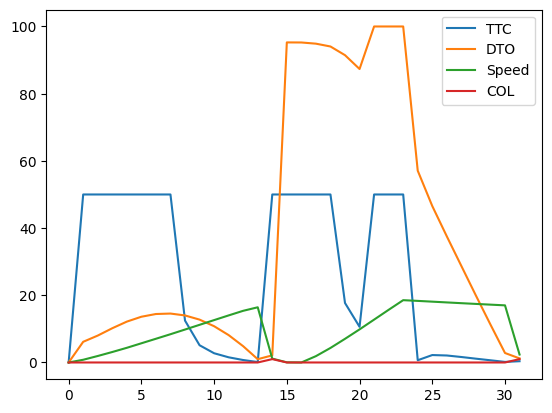

In [20]:
df[[df.columns[1], df.columns[2], df.columns[4], df.columns[-1]]].plot()

In [21]:
modelsDeep = [
    "MLPClassifier_deep_569-24-28-189",
    "RandomForestClassifier_deep_582-11-32-185",
    "SVC_deep_577-16-89-128",
    "XGBClassifier_deep_576-17-24-193"
]

modelsGen = [
    "MLPClassifier_gen_PI4_RBC5_75-34-22-68",
    "RandomForestClassifier_gen_PI4_RBC5_82-34-15-68",
    "SVC_gen_PI4_RBC5_82-38-15-64",
    "XGBClassifier_gen_PI4_RBC5_82-15-27-75"
]

In [22]:
dd_Gen = getPredsGen(modelsGen, data)

Model loaded!
Model loaded!
Model loaded!
[15:50:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

Model loaded!


In [23]:
dd_Deep = getPredsDeep(modelsDeep, df)

Model loaded!
Model loaded!
Model loaded!
Model loaded!


In [24]:
# getPreds(dd_Gen)

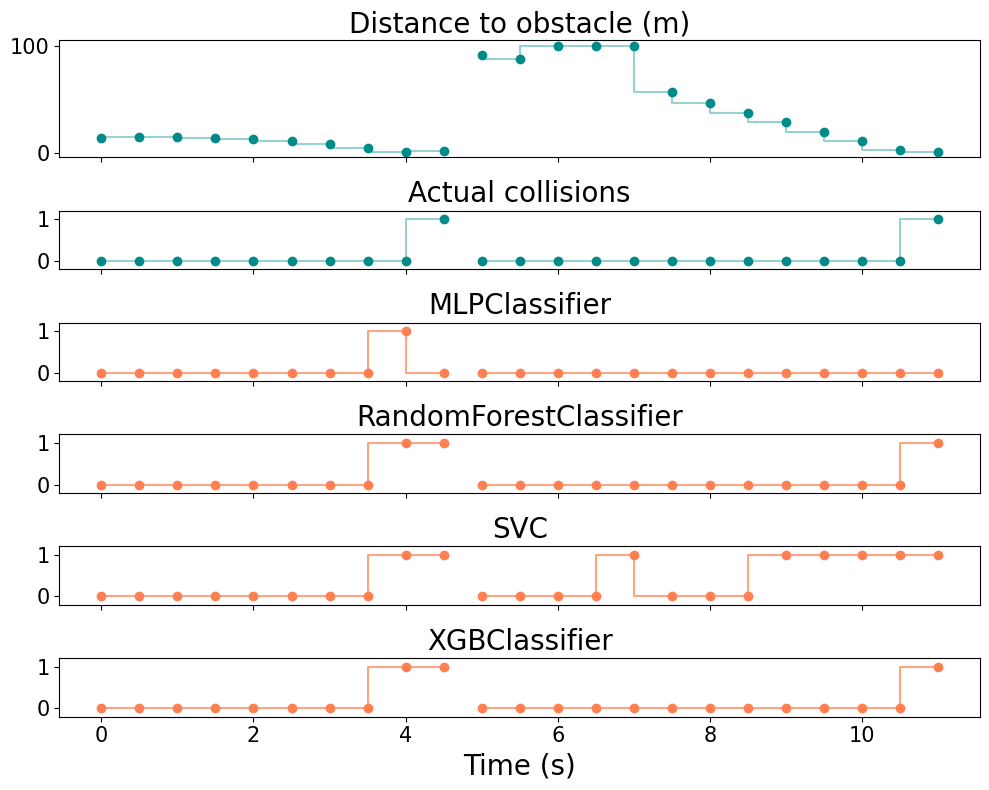

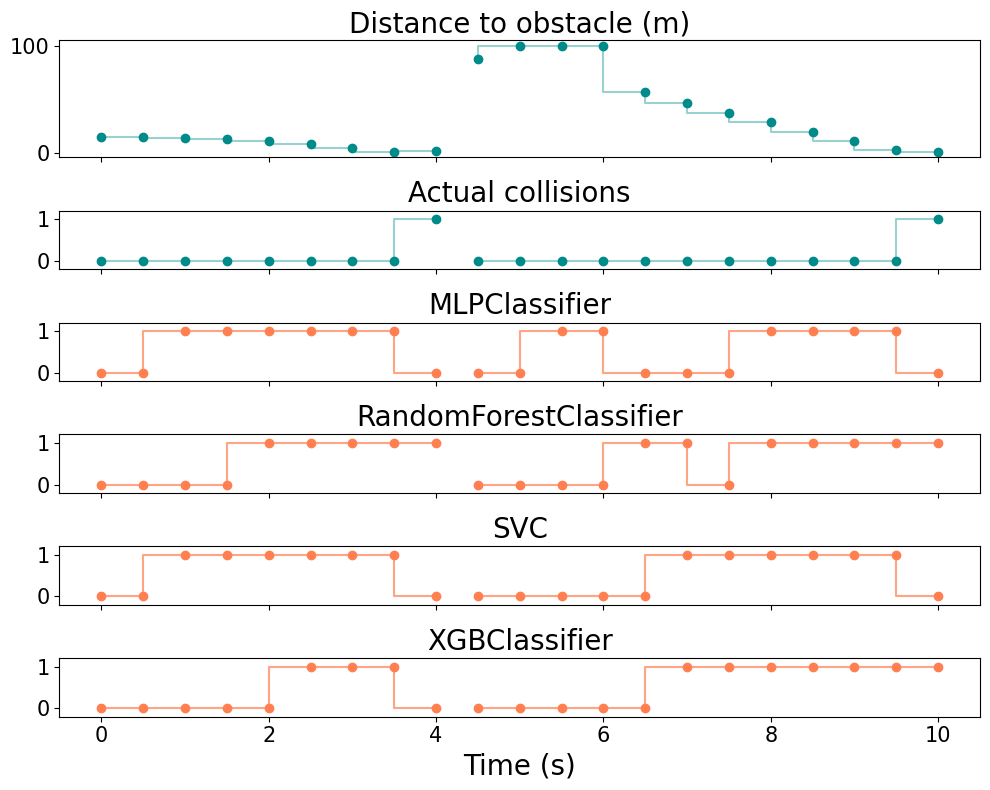

In [25]:
plotCompare(dd_Deep, False, saveFig=True, filename="deepResults", splice=10)
plotCompare(dd_Gen, False, saveFig=True, filename="genResults", splice=9)